# An interpolation scheme in demosaicking
For reference (and for all <font color='red'>R</font><font color='green'>G</font><font color='blue'>B</font>channels) - but with no educational charm **what.so.ever**...

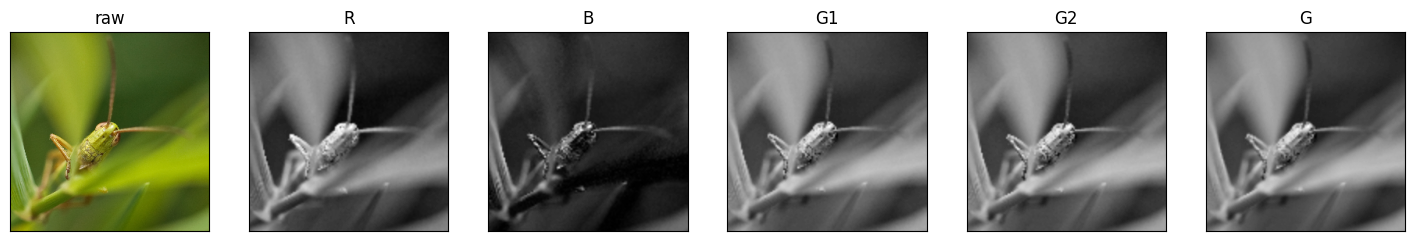

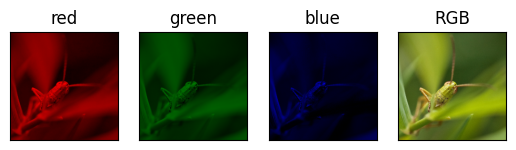

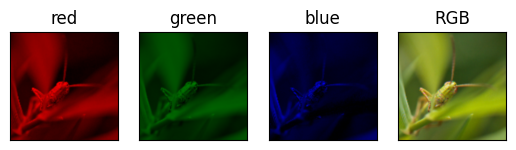

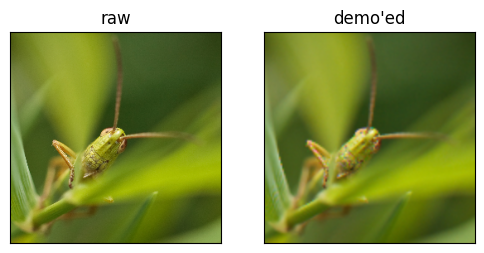

In [24]:
import cv2; import numpy as np; import auxiliary as aux
img = cv2.cvtColor(cv2.imread('./images/GrassHopper.png'), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_LINEAR_EXACT)

## Demosaicking by interpolation
N, M, _ = img.shape
R_raw, B_raw, G1_raw, G2_raw  = img[0:N:2, 0:M:2, 0], img[1:N:2, 1:M:2, 2], img[1:N:2, 0:M:2, 1], img[0:N:2, 1:M:2, 1]

R, B, G1, G2 = [cv2.resize(channel_raw, (M, N), interpolation = cv2.INTER_LINEAR_EXACT) for channel_raw in (R_raw, B_raw, G1_raw, G2_raw)]
channels = ('raw', 'R', 'B', 'G1', 'G2', 'G')
aux.displayImages((img, R, B, G1, G2, G1//2+G2//2), channels, grid = False)

rgb = np.dstack((R, G1//2 + G2//2, B))
channels = ('red', 'green', 'blue')
# The Bayer CFA mosaic (aka 'RAW') and the de-mosaicked image
aux.displayChannels((img, rgb), channels)

images = ('raw', 'demo\'ed')
aux.displayImages((img, rgb), images, grid = False)

## A **s[ligh|ignifican]tly** more re-educational version...
Here we re-use (albeit for the **<font color='red'>R</font> channel** only...) our own (and a bit majestic) interpolating routine!

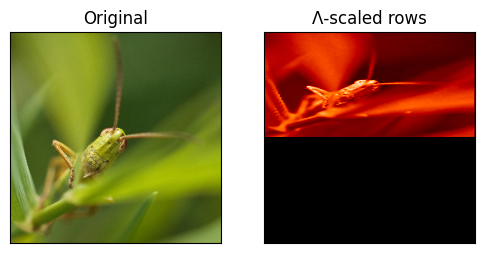

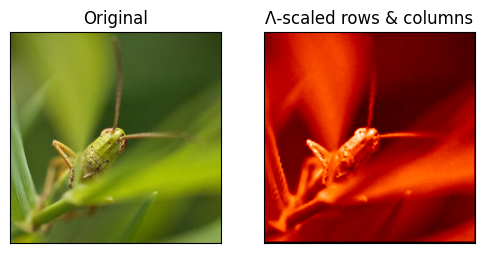

In [26]:
from interpolation import Π, Λ, ϕ, ξ, interpolate as ΣΣ
from auxiliary import displayImages as DI, displayChannels as DC

ψ, reds = Λ, 'gist_heat'; name = ψ.__name__

red = np.zeros((N, N))
for m in range(M//2):
   red[m, ...] = np.array(ΣΣ(R_raw[m, ...], N, φ = ψ)).flat
DI((img, red), ('Original', f'{name}-scaled rows'), cmp = reds, grid = False)

for n in range(N):
   red[..., n] = np.array(ΣΣ(red[:M//2, n], N, φ = ψ)).flat
DI((img, red), ('Original', f'{name}-scaled rows & columns'), cmp = reds, grid = False)